11.8


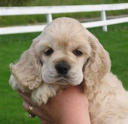

In [29]:
from fastai.vision.all import *

defaults.device = torch.device('cuda')
print(torch.version.cuda)

dest = 'data/raw-img/cane/OIP-_4M8lLVlk06o0YOtolSlvQHaHL.jpeg'
im = Image.open(dest)
im.to_thumb(128,128)

In [30]:
path = Path('data/raw-img')
fns = get_image_files(path)
fns

(#26179) [Path('data/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg'),Path('data/raw-img/cane/OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg'),Path('data/raw-img/cane/OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg'),Path('data/raw-img/cane/OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg'),Path('data/raw-img/cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg'),Path('data/raw-img/cane/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg'),Path('data/raw-img/cane/OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg'),Path('data/raw-img/cane/OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg'),Path('data/raw-img/cane/OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg'),Path('data/raw-img/cane/OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg')...]

In [10]:
failed = verify_images(fns)
failed

(#0) []

In [11]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      c:\users\nikita\.conda\envs\p310\lib\site-packages\fastai\vision\utils.py
Type:      function

In [13]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(128)
)

In [14]:
dls = animals.dataloaders(path)

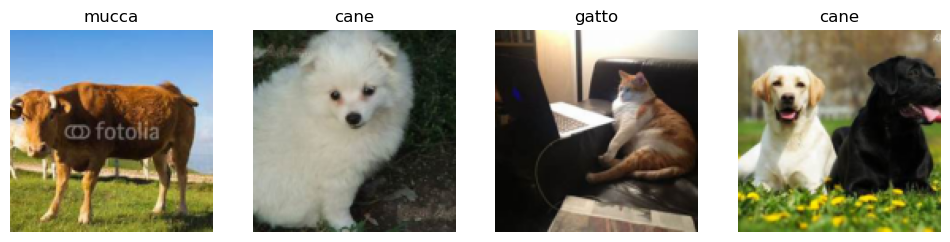

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

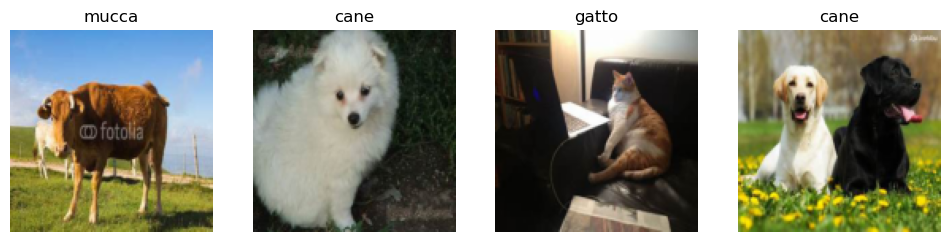

In [18]:
animals = animals.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = animals.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

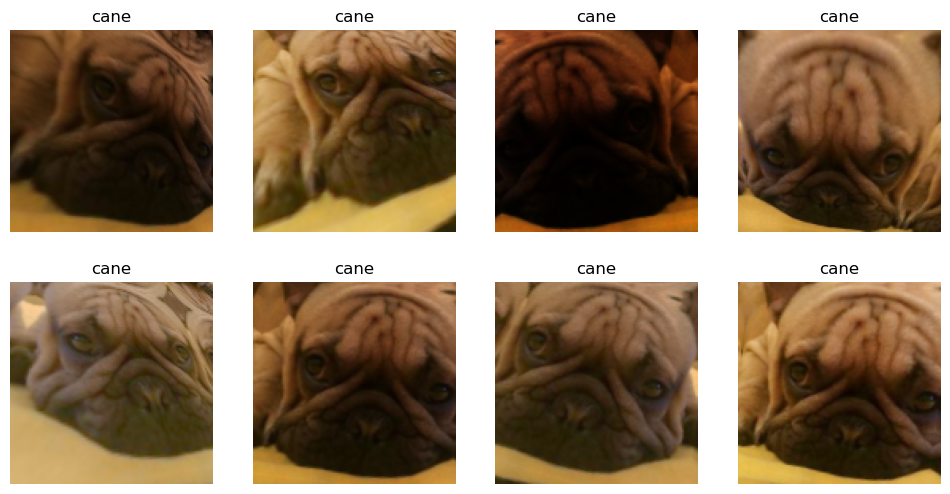

In [22]:
animals = animals.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = animals.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [31]:
animals = animals.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = animals.dataloaders(path)
#dls.valid.show_batch(max_n=4, nrows=1)

In [34]:
learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.517210,0.355730,0.114231,06:53


epoch,train_loss,valid_loss,error_rate,time
0,0.294758,0.231630,0.069914,02:59
1,0.194152,0.224794,0.064565,02:59
2,0.125163,0.233556,0.063228,02:58
3,0.063029,0.230728,0.057498,02:59
4,0.011188,0.227019,0.053295,02:57
5,0.005850,0.224759,0.051958,02:58


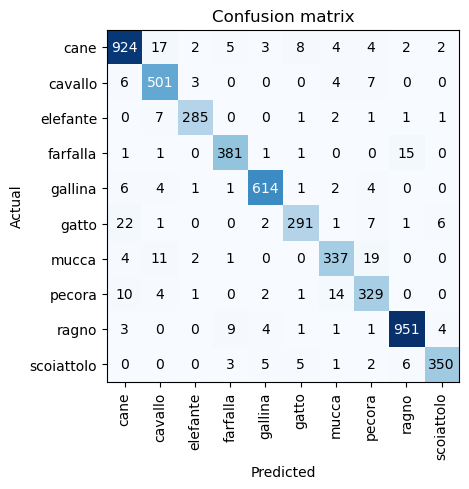

In [36]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [26]:
x = torch.rand(100,100)
x_gpu = x.cuda()

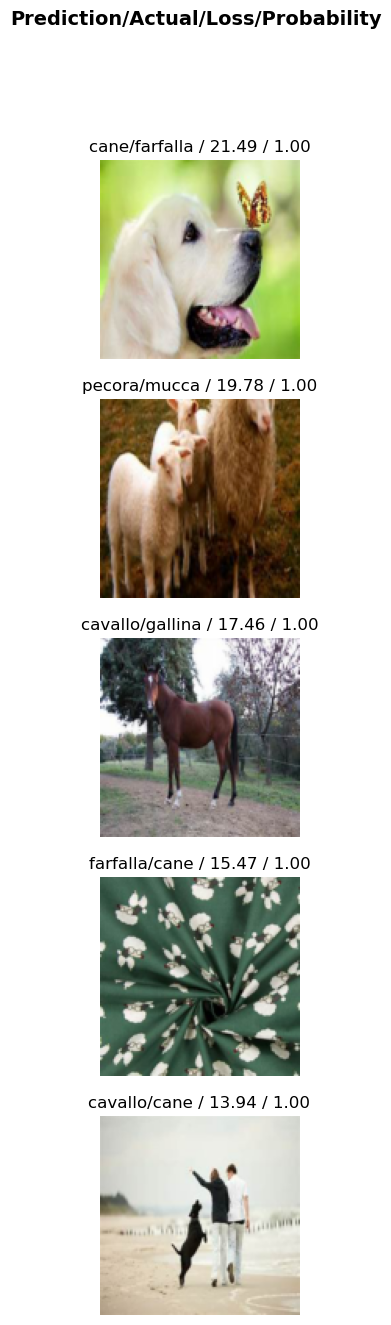

In [37]:
interp.plot_top_losses(5, nrows=5)

In [43]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learner)
cleaner

In [54]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [56]:
animals = animals.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = animals.dataloaders(path)
#dls.valid.show_batch(max_n=4, nrows=1)

learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.522007,0.311428,0.097570,02:56


epoch,train_loss,valid_loss,error_rate,time
0,0.287072,0.210557,0.066195,02:59
1,0.211538,0.242498,0.078439,02:59
2,0.120377,0.202124,0.056820,03:00
3,0.046113,0.215478,0.057968,03:00
4,0.014860,0.184232,0.045150,03:00
5,0.004339,0.182182,0.044959,03:00


In [57]:
learner.export()

In [58]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [60]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('e1f2931b0ac1496.jpg')

('gatto',
 tensor(5),
 tensor([1.0779e-05, 1.8448e-06, 1.5754e-05, 3.6416e-04, 1.5550e-05, 9.9954e-01,
         2.7253e-06, 9.4687e-06, 2.3687e-05, 1.3005e-05]))

In [63]:
learn_inf.dls.vocab

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

In [74]:
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value=(), description='Upload')

In [77]:
btn_upload = SimpleNamespace(data = ['e1f2931b0ac1496.jpg'])
img = PILImage.create(btn_upload.data[-1])

In [78]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [79]:
pred, pred_idx, probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: gatto; Probability: 0.9995')

In [95]:
btn_run = widgets.Button(description='Classify')
#btn_run

In [96]:
def on_click_classify(change):
    print(btn_upload)
    img = PILImage.create(btn_upload.value[-1].name)
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [97]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Загрузи животину'), btn_upload, btn_run, out_pl, lbl_pred])

In [99]:
!jupyter server extension enable voila --sys-prefix

Extension package jupyterlab took 0.6149s to import
voila | error adding extension (enabled: True): The module 'voila' could not be found (No module named 'voila'). Are you sure the extension is installed?
    Traceback (most recent call last):
      File "C:\Users\nikita\.conda\envs\p310\lib\site-packages\jupyter_server\extension\manager.py", line 323, in add_extension
        extpkg = ExtensionPackage(name=extension_name, enabled=enabled)
      File "C:\Users\nikita\.conda\envs\p310\lib\site-packages\jupyter_server\extension\manager.py", line 187, in __init__
        self._load_metadata()
      File "C:\Users\nikita\.conda\envs\p310\lib\site-packages\jupyter_server\extension\manager.py", line 202, in _load_metadata
        raise ExtensionModuleNotFound(msg) from None
    jupyter_server.extension.utils.ExtensionModuleNotFound: The module 'voila' could not be found (No module named 'voila'). Are you sure the extension is installed?
Enabling: voila
- Writing config: C:\Users\nikita\.con

In [118]:
!jupyter nbconvert --output-dir='./reqs' --to script animal_class10.ipynb reqspipreqs

[NbConvertApp] WARNING | pattern 'reqspipreqs' matched no files
[NbConvertApp] Converting notebook animal_class10.ipynb to script
[NbConvertApp] Writing 3372 bytes to reqs\animal_class10.py


In [126]:
import session_info

session_info.show()